In [1]:
# Importing libraries
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd 
import numpy as np

In [2]:
# Reading csv file
Retail = pd.read_csv('Global+Superstore+Data.csv')
Retail.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [3]:
# shape of the dataframe
Retail.shape

(51290, 5)

In [4]:
# checking the datatypes
Retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [5]:
#summary of all the numeric columns in the dataset
Retail.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


#### Data Preparation

In [6]:
# creating new column Market_Segment
Retail['Market_Segment']= Retail['Market']+'_' +Retail['Segment']
Retail.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US_Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa_Consumer


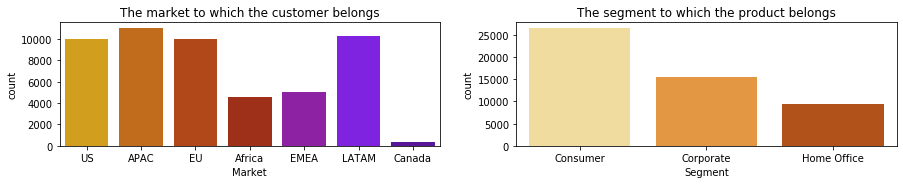

In [7]:
#customer segments and Market-Segments plot
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.countplot(Retail['Market'], palette= 'gnuplot_r')
plt.title('The market to which the customer belongs')

plt.subplot(2,2,2)
sns.countplot(Retail['Segment'], palette= 'YlOrBr')
plt.title('The segment to which the product belongs')
plt.show()

In [8]:
#counts of unique values there are 21 unique Market-Segment
len(Retail.Market_Segment.value_counts())

21

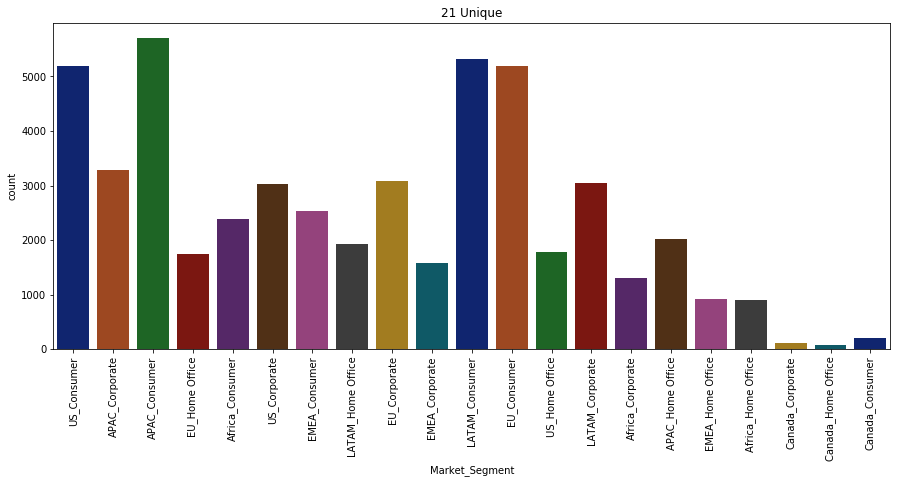

In [9]:
# APAC_Consumer has the highest count
plt.figure(figsize=(15,6))
sns.countplot(Retail['Market_Segment'], palette='dark')
plt.title('21 Unique')
plt.xticks(rotation=90)
plt.show()

In [10]:
#dropping the columns 'Market' and 'Segment'
Retail=Retail.drop(['Market','Segment'],axis=1)
Retail.head()

,Order Date,Sales,Profit,Market_Segment
0,31-07-2012,2309.650,762.1845,US_Consumer
1,05-02-2013,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,5175.171,919.9710,APAC_Consumer
3,28-01-2013,2892.510,-96.5400,EU_Home Office
4,05-11-2013,2832.960,311.5200,Africa_Consumer


In [11]:
# converting the order-date into a date-time format Month-year
Retail['Order Date'] = pd.to_datetime(Retail['Order Date']).dt.to_period('m')
Retail.head()

,Order Date,Sales,Profit,Market_Segment
0,2012-07,2309.650,762.1845,US_Consumer
1,2013-05,3709.395,-288.7650,APAC_Corporate
2,2013-10,5175.171,919.9710,APAC_Consumer
3,2013-01,2892.510,-96.5400,EU_Home Office
4,2013-05,2832.960,311.5200,Africa_Consumer


In [12]:
# Agg the data on year-month and market-seg
Agg_Profit = Retail.pivot_table(index = 'Order Date', values = 'Profit', columns = 'Market_Segment', aggfunc = 'sum')
Agg_Profit.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [13]:
#  got the data for 48 months 
Agg_Profit.shape

(48, 21)

#### Test-Train Split

In [14]:
#After the above step, performing the train-test split such that you take the 42 months as the train data and the 6 months as the test data.

train_len = 42
train = Agg_Profit[0:train_len] # First 42 months as train set
test = Agg_Profit[train_len:] #Last 6 months as test set

In [15]:
train.shape

(42, 21)

In [16]:
train.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


#### CoV on the profit 
- coefficient of variation is a ratio of the standard deviation to mean.
- checking the standard deviation and the mean calculated on profit for all the 21 market segments and compare.
- forecast the sales ( less variation in the profits)

In [17]:
Mean =np.mean(train)
STD= np.std(train)

CoV = pd.DataFrame(Mean)
CoV['std']= STD
CoV['CoV'] = STD/Mean
CoV = CoV.reset_index()
CoV.columns= ['Market_Segment','Mean', 'Std','CoV']
CoV.sort_values(by='CoV', ascending= True, inplace = True)
CoV

,Market_Segment,Mean,Std,CoV
0,APAC_Consumer,4400.894243,2300.457687,0.522725
1,APAC_Corporate,2574.919807,1364.837734,0.530051
12,EU_Consumer,3699.977143,2202.282289,0.595215
15,LATAM_Consumer,2295.555697,1569.632686,0.683770
13,EU_Corporate,2216.299429,1600.336696,0.722076
16,LATAM_Corporate,1122.633016,990.360880,0.882177
14,EU_Home Office,1224.456536,1148.627937,0.938072
2,APAC_Home Office,1511.088314,1523.508658,1.008219
18,US_Consumer,2686.740912,2715.031412,1.010530
19,US_Corporate,1754.199083,1880.200775,1.071829


In [18]:
# The least  variation in the profits
least_COV =min(CoV["CoV"])
least_COV

0.5227250555218098

##### The most profitable market segment by comparing the 21 CoV values is below:
- APAC_Consumer	
- with 0.522725 least coefficient of variation

In [19]:
# convert the Order-Date column from "DateTime" to "timestamp"
Retail['Order Date'] = Retail['Order Date'].astype(str)
Retail['Order Date']=pd.to_datetime(Retail['Order Date'])
Retail['Order Date'].dtype

dtype('<M8[ns]')

In [20]:
# Filter the data for most consistant market-segment - APAC_Consumer

most_profitable = Retail[(Retail.Market_Segment=='APAC_Consumer')]
most_profitable.head()

,Order Date,Sales,Profit,Market_Segment
2,2013-10-01,5175.171,919.971,APAC_Consumer
6,2011-07-01,1822.080,564.840,APAC_Consumer
7,2012-04-01,5244.840,996.480,APAC_Consumer
14,2013-06-01,3701.520,1036.080,APAC_Consumer
29,2012-02-01,1878.720,582.360,APAC_Consumer


In [21]:
most_profitable.shape

(5699, 4)

In [22]:
# grouped the most_profitable market segment on Order date and  Sales

Final_MS =pd.DataFrame(most_profitable.groupby("Order Date")['Sales'].sum())
Final_MS.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [23]:
# 48 months 
Final_MS.shape

(48, 1)

### Time series analysis

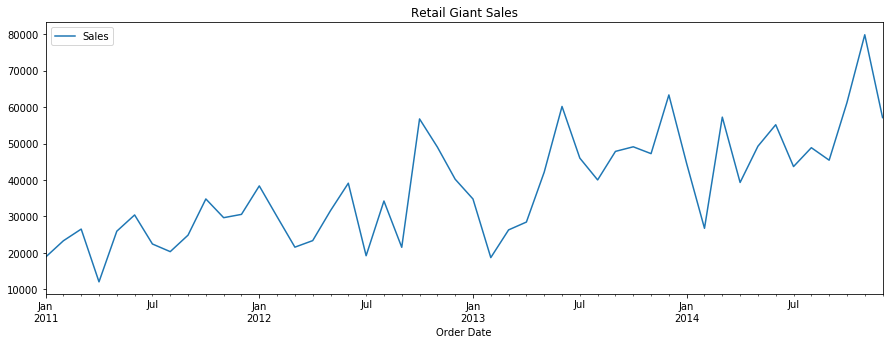

In [24]:
# Time Series Plot 
Final_MS.plot(figsize=(15, 5))
plt.legend(loc='best')
plt.title('Retail Giant Sales')
plt.show()

#### Split time series data into training and test set

In [25]:
train_len = 42
train = Final_MS[0:train_len] # First 42 months as train set
test = Final_MS[train_len:] #Last 6 months as test set

### Time series Decomposition

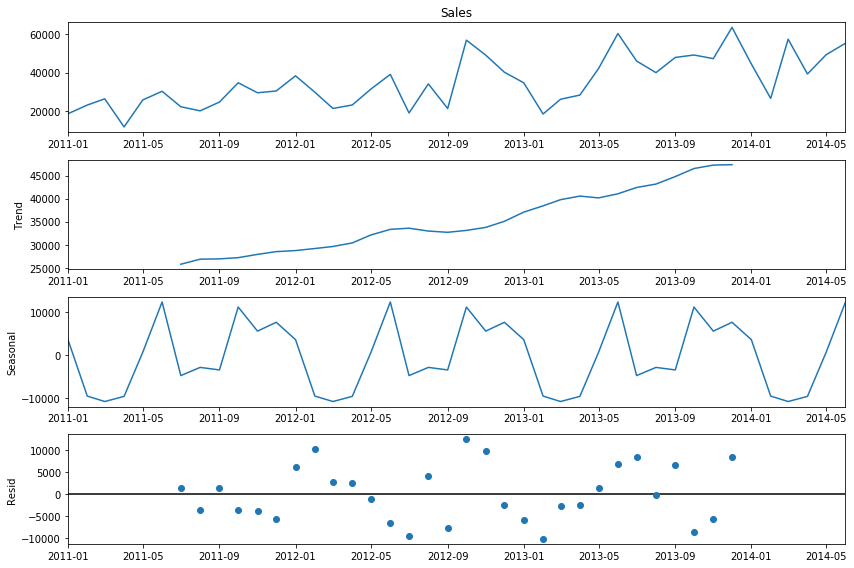

In [26]:
#Additive seasonal decomposition

from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

#Individual components can be added to get the time-series data

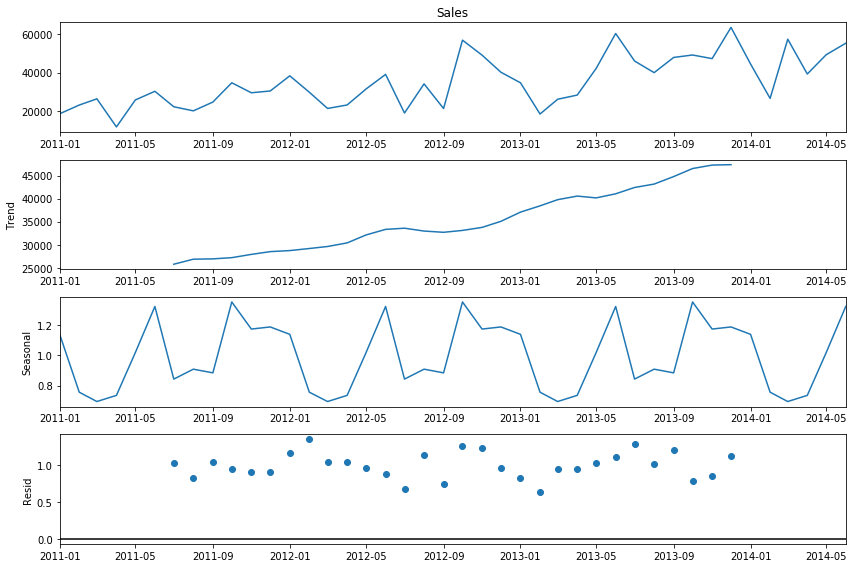

In [27]:
#Multiplicative seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

#Individual components can be multiplied to get the time-series data

### Building and evaluating  time series forecast
- Naive method	
- Simple average method	
- Simple moving average forecast	
- Simple exponential smoothing forecast	
- Holt's exponential smoothing method	
- Holt Winters' additive method	
- Holt Winters' multiplicative method	
- Autoregressive (AR) method	
- Moving Average (MA) method	
- Autoregressive moving average (ARMA) 
- Autoregressive integrated moving average (ARIMA)
- Seasonal autoregressive integrated moving average (SARIMA) 

In [28]:
#Naive method
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1]

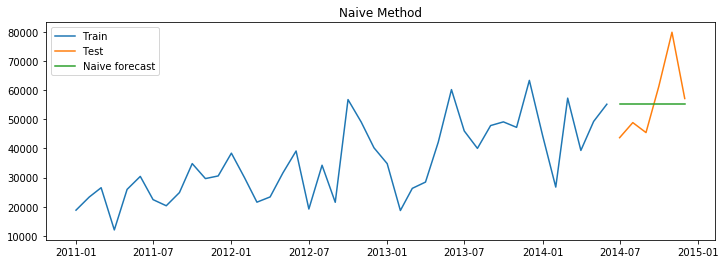

In [29]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

# The forecast for the next six months is the same value as the last observation of the blue line

In [30]:
#RMSE and MAPE calculation

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47


In [31]:
#Simple average method
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()

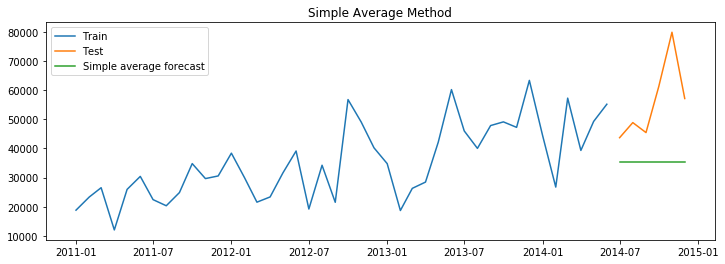

In [32]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

#Green line forecasted has no trend or seasonality while train and test data had both trend and seasonality.

In [33]:
#RMSE and MAPE calculation
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34


In [34]:
#Simple moving average forecast: Helps to reduce unsystematic noise in the data

y_hat_sma = Final_MS.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = Final_MS['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

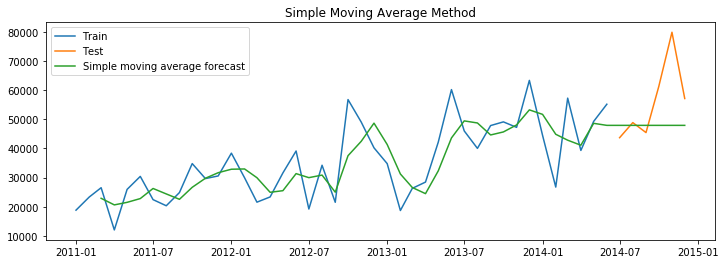

In [35]:
#Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [36]:
#RMSE and MAPE calculation

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82


In [37]:
# Simple exponential smoothing: a time series forecasting method for univariate data without a trend or seasonality

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

C:\Users\prati\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


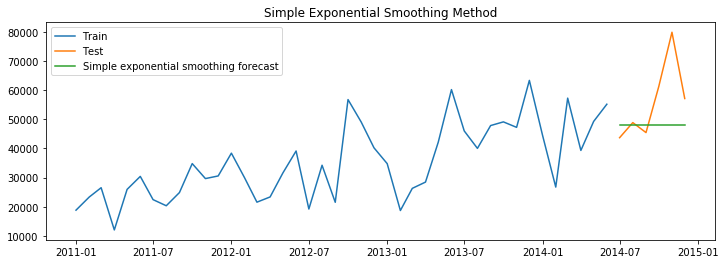

In [38]:
#Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

# It  can be seen that the level of a time series is captured.

In [39]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14765.75,15.83


In [40]:
### Holt's Exponential Smoothing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 18821.989799999996, 'initial_slope': 4491.3633000000045, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


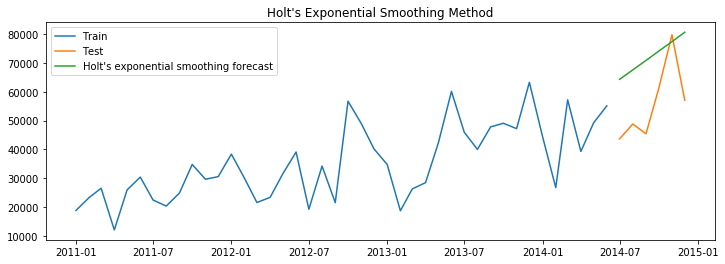

In [41]:
#Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [42]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14765.75,15.83
0,Holt's exponential smoothing method,18976.37,34.57


In [43]:
### Holt Winters' additive method with trend and seasonality

y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.0020374886703564874, 'smoothing_slope': 0.0020374868438797038, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 29676.666994239353, 'initial_slope': 723.317636007915, 'initial_seasons': array([ -9378.87329099, -19734.27615341, -12187.76564172, -19978.47396353,
        -9315.9790386 ,  -1060.75172544, -14280.27499763, -12958.46182918,
       -13443.04599114,    963.6376487 ,  -4636.67766042,  -2722.90140336]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\prati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


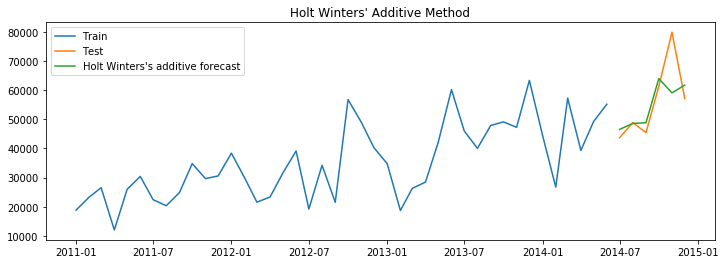

In [44]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

# It can be seen that  seasonal variation and  the trend is captured 

In [45]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14765.75,15.83
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,8942.57,8.84


In [46]:
# Holt Winters' multiplicative method

y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 9.693028733848621e-09, 'smoothing_slope': 9.123559401830165e-09, 'smoothing_seasonal': 2.9299671943913878e-08, 'damping_slope': nan, 'initial_level': 34110.96530161187, 'initial_slope': 730.4170382646302, 'initial_seasons': array([0.71585886, 0.4862027 , 0.68202326, 0.53148784, 0.73796969,
       0.90144356, 0.6247045 , 0.6570469 , 0.64896112, 0.93178148,
       0.82775312, 0.88438021]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\prati\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


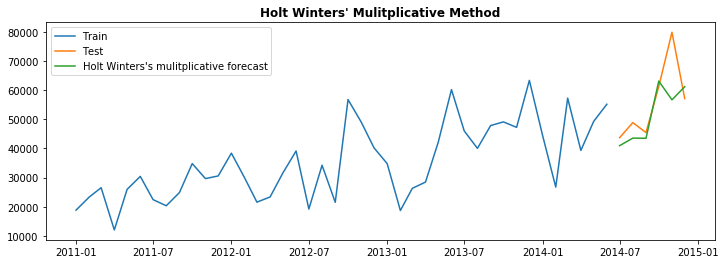

In [47]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method', fontweight='bold')
plt.show()

In [48]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14765.75,15.83
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,8942.57,8.84
0,Holt Winters' multiplicative method,9976.32,10.12


- Holt Winter's Additive Method is giving the better forecast to the sales for the 6 months as the predicted sales are closer to the actual sales.
- The least RMSE and MAPE values  among all the methods done above is Holt Winters' additive method.

### Auto Regressive methods

##### Stationarity vs non-stationary time series

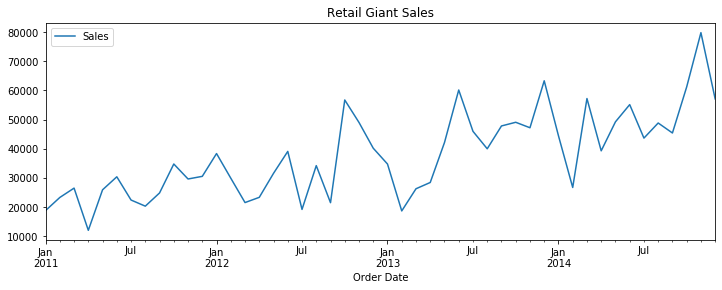

In [49]:
Final_MS['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales')
plt.show(block=False)

#### Augmented Dickey-Fuller (ADF) test
- Null Hypothesis: p−value>0.05  (The series is not stationary)  
- Alternate Hypothesis: p−value<=0.05 (The series is stationary) 

In [50]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(Final_MS['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

# Null Hypothesis rejected as p-value is 0.011 which is less than 0.05.The series is stationary

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
- Null Hypothesis: p−value>0.05  (The series is stationary)
- Alternate Hypothesis: p−value<=0.05  (The series is not stationary)

In [51]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(Final_MS['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

# The series is not stationary as p-value is 0.024 which is less than 0.05

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


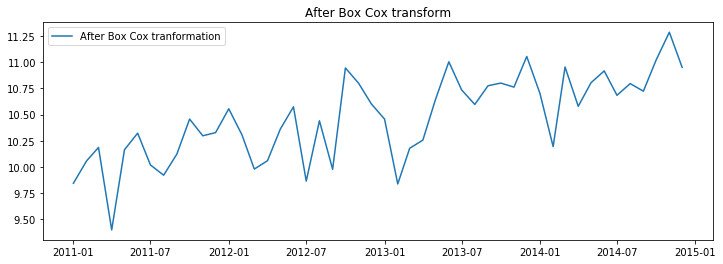

In [52]:
## Box Cox transformation to make variance constant

from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(Final_MS['Sales'], lmbda=0), index = Final_MS.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

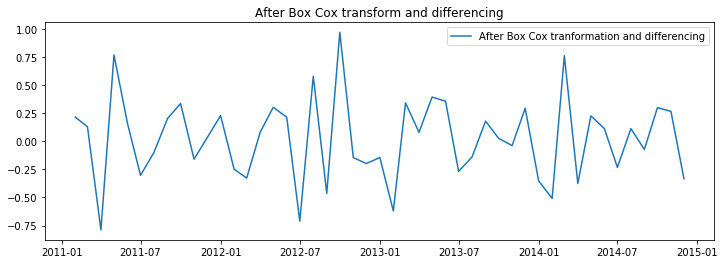

In [53]:
## Differencing to remove trend

data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), Final_MS.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [54]:
data_boxcox_diff.dropna(inplace=True)

In [55]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
dtype: float64

In [56]:
# Augmented Dickey-Fuller (ADF) test

adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

## Null Hypothesis rejected as p-value is 0.000170 which is less than 0.05.
#The series is stationary 

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


In [57]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

## Fail to reject the null hypothesis as p-value is 0.100000 which is more than 0.05.
#The series is stationary 

KPSS Statistic: 0.156456
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\Users\prati\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


#### Autocorrelation function (ACF)

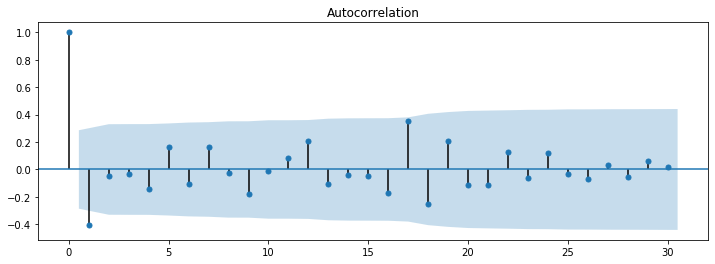

In [58]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

#### Partial autocorrelation function (PACF)

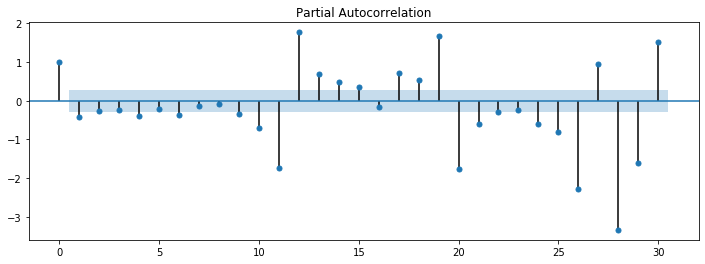

In [59]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

In [60]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [61]:
train_data_boxcox_diff

Order Date
2011-02-01    0.214000
2011-03-01    0.128816
2011-04-01   -0.789102
2011-05-01    0.767119
2011-06-01    0.158548
2011-07-01   -0.303937
2011-08-01   -0.098320
2011-09-01    0.201126
2011-10-01    0.335976
2011-11-01   -0.159845
2011-12-01    0.030117
2012-01-01    0.227734
2012-02-01   -0.248683
2012-03-01   -0.327663
2012-04-01    0.079944
2012-05-01    0.301872
2012-06-01    0.213622
2012-07-01   -0.710884
2012-08-01    0.577494
2012-09-01   -0.463894
2012-10-01    0.969434
2012-11-01   -0.146063
2012-12-01   -0.198531
2013-01-01   -0.144942
2013-02-01   -0.620558
2013-03-01    0.341112
2013-04-01    0.078691
2013-05-01    0.392955
2013-06-01    0.355907
2013-07-01   -0.268628
2013-08-01   -0.139388
2013-09-01    0.178702
2013-10-01    0.026014
2013-11-01   -0.038982
2013-12-01    0.293485
2014-01-01   -0.353341
2014-02-01   -0.508883
2014-03-01    0.761118
2014-04-01   -0.375717
2014-05-01    0.225410
2014-06-01    0.113222
dtype: float64

### Auto regression method (AR)



In [62]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


C:\Users\prati\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [63]:
# Recover original time series

y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

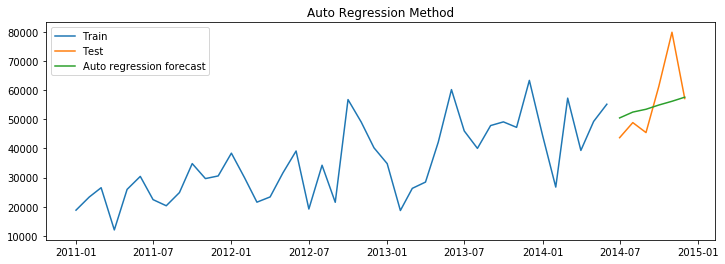

In [64]:
#Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

# Seasonality is cannot be seen in this plot but trent is captured in the forecast. 

In [65]:
#Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14765.75,15.83
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,8942.57,8.84
0,Holt Winters' multiplicative method,9976.32,10.12
0,Autoregressive (AR) method,10985.28,13.56


### Moving average method (MA)


In [66]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


C:\Users\prati\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [67]:
#Recover original time series

y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

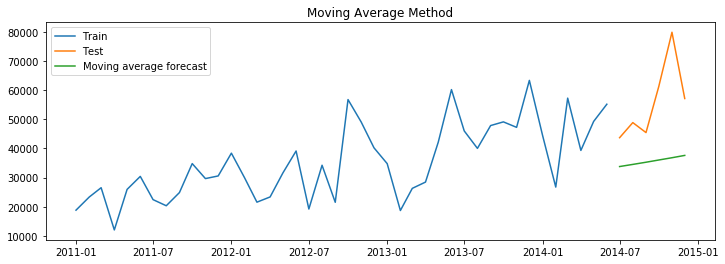

In [68]:
#Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(Final_MS['Sales'][:train_len], label='Train')
plt.plot(Final_MS['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

#Captured trend but not seasonality in the forecast as per the plot.

In [69]:
#Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

#Too many errors as RMSE and MAPE values are high 

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14765.75,15.83
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,8942.57,8.84
0,Holt Winters' multiplicative method,9976.32,10.12
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93


### Auto regression moving average method (ARMA)

In [70]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


C:\Users\prati\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [71]:
#Recover original time series
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

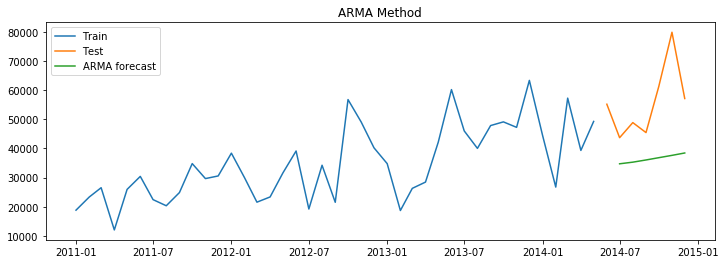

In [72]:
#Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot( Final_MS['Sales'][:train_len-1], label='Train')
plt.plot(Final_MS['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

#ARMA model captured Trend but no seasonality

In [73]:
#Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14765.75,15.83
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,8942.57,8.84
0,Holt Winters' multiplicative method,9976.32,10.12
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


### Auto regressive integrated moving average (ARIMA)

In [74]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

C:\Users\prati\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\prati\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


In [75]:
# Recover original time series forecast

y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

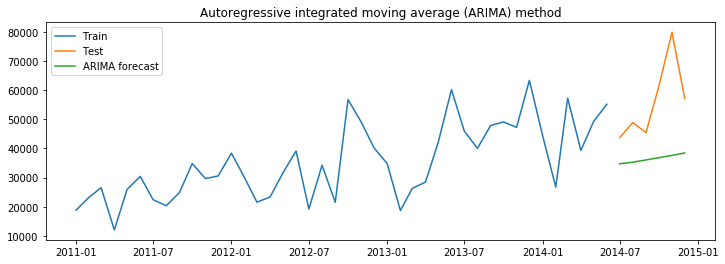

In [76]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [77]:
## Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14765.75,15.83
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,8942.57,8.84
0,Holt Winters' multiplicative method,9976.32,10.12
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


### Seasonal auto regressive integrated moving average (SARIMA)

In [78]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

C:\Users\prati\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\prati\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ar.L1      -0.041758
ma.L1      -0.997142
ar.S.L12    0.099964
ma.S.L12   -0.972619
sigma2      0.058191
dtype: float64


In [79]:
## Recover original time series forecast

y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

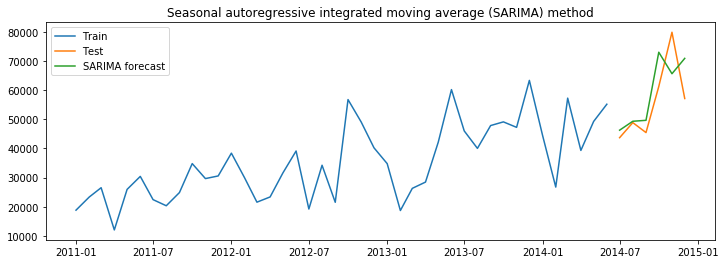

In [80]:
## Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

#It can be seen in the plot that the forecast captured both trend and seasonality 

In [81]:
## Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14765.75,15.83
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,8942.57,8.84
0,Holt Winters' multiplicative method,9976.32,10.12
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


## Conclusion 

- There are 21 unique market Segments.
- The most profitable market segment by comparing the  CoV values is APAC_Consumer 
- The least RMSE and MAPE values among all  forecasting method in the smoothing techniqueis is Holt Winters' additive method.
- The least RMSE and MAPE values among all the method done in ARIMA set of techniques is SARIMA method means the best method.
